# Section 6: Exploratory Data Analysis

## 1. Filtering

In [1]:
import pandas as pd

groceries = pd.read_pickle('../Data/groceries_with_new_columns.pkl')
groceries.head()

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
0,P100010,100010,Produce,Fruit,Apple,False,1.50,349,7.2,,2023-06-12 15:35:00,15:35:00,2023-06-15,Thursday
1,P100011,100011,Produce,Fruit,Banana,False,0.40,500,10.3,,2023-06-12 18:30:00,18:30:00,2023-06-15,Thursday
2,P100012,100012,Produce,Fruit,Grapes,False,4.00,200,4.1,,2023-06-12 17:22:00,17:22:00,2023-06-15,Thursday
3,P100013,100013,Produce,Fruit,Grapefruit,False,0.99,50,1.0,,2023-06-12 16:29:00,16:29:00,2023-06-15,Thursday
4,P100014,100014,Produce,Fruit,Organic Strawberries,True,3.99,148,3.0,,2023-06-12 18:10:00,18:10:00,2023-06-15,Thursday


In [2]:
# filter on low inventory
groceries[groceries['Low Inventory'] == 'Low Inventory']

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
15,P100025,100025,Produce,Dairy,Milk (Soy),False,4.49,32,0.7,Low Inventory,2023-06-13 08:37:00,08:37:00,2023-06-17,Saturday
17,P100027,100027,Pantry,Snacks,Apple Sauce - organic,True,1.50,27,0.6,Low Inventory,2023-06-10 12:02:00,12:02:00,2023-06-24,Saturday
20,P100030,100030,Pantry,Snacks,Raisins,False,2.99,5,0.1,Low Inventory,2023-06-10 12:38:00,12:38:00,2023-06-24,Saturday


In [3]:
# compare with .loc
groceries.loc[groceries['Low Inventory'] == 'Low Inventory', ['Price_Dollars', 'Inventory']]

,Price_Dollars,Inventory
15,4.49,32
17,1.50,27
20,2.99,5


In [4]:
# filter on the snacks subcategory
groceries[groceries.Subcategory == 'Snacks']

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW


In [5]:
# check one value
groceries.Subcategory[15]

' Dairy'

In [6]:
# strip then filter
groceries.Subcategory = groceries.Subcategory.str.strip()

In [7]:
# filter on low inventory snacks
mask = (groceries['Low Inventory'] == 'Low Inventory') & (groceries.Subcategory == 'Snacks')
groceries[mask]

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
17,P100027,100027,Pantry,Snacks,Apple Sauce - organic,True,1.50,27,0.6,Low Inventory,2023-06-10 12:02:00,12:02:00,2023-06-24,Saturday
20,P100030,100030,Pantry,Snacks,Raisins,False,2.99,5,0.1,Low Inventory,2023-06-10 12:38:00,12:38:00,2023-06-24,Saturday


In [8]:
# filter rows and columns
groceries.loc[mask, ['Subcategory', 'Item', 'Inventory']]

,Subcategory,Item,Inventory
17,Snacks,Apple Sauce - organic,27
20,Snacks,Raisins,5


## 2. Sorting

In [9]:
# filter on price
groceries.sort_values('Price_Dollars').head()

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
1,P100011,100011,Produce,Fruit,Banana,False,0.40,500,10.3,,2023-06-12 18:30:00,18:30:00,2023-06-15,Thursday
9,P100019,100019,Produce,Vegetable,Cucumber,False,0.99,230,4.7,,2023-06-12 17:47:00,17:47:00,2023-06-15,Thursday
3,P100013,100013,Produce,Fruit,Grapefruit,False,0.99,50,1.0,,2023-06-12 16:29:00,16:29:00,2023-06-15,Thursday
16,P100026,100026,Produce,Dairy,Yogurt,False,1.00,432,8.9,,2023-06-13 08:41:00,08:41:00,2023-06-17,Saturday
17,P100027,100027,Pantry,Snacks,Apple Sauce - organic,True,1.50,27,0.6,Low Inventory,2023-06-10 12:02:00,12:02:00,2023-06-24,Saturday


In [10]:
# filter on price descending
groceries.sort_values('Price_Dollars', ascending=False).head()

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
23,P100033,100033,Frozen,Frozen Fruit,Frozen Blueberries,False,10.99,162,3.3,,2023-05-28 22:14:00,22:14:00,2023-06-28,Wednesday
11,P100021,100021,Produce,Meat,Chicken (Organic),True,10.49,284,5.8,,2023-06-13 07:20:00,07:20:00,2023-06-17,Saturday
10,P100020,100020,Produce,Meat,Beef,False,8.99,145,3.0,,2023-06-13 07:00:00,07:00:00,2023-06-17,Saturday
12,P100022,100022,Produce,Meat,Turkey,False,7.99,188,3.9,,2023-06-13 07:32:00,07:32:00,2023-06-17,Saturday
24,P100034,100034,Frozen,Frozen Fruit,Frozen Pineapple,False,7.96,178,3.7,,2023-05-28 22:11:00,22:11:00,2023-06-28,Wednesday


In [11]:
# sort on multiple columns
groceries.sort_values(['Subcategory', 'Price_Dollars']).head(10)

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
16,P100026,100026,Produce,Dairy,Yogurt,False,1.00,432,8.9,,2023-06-13 08:41:00,08:41:00,2023-06-17,Saturday
14,P100024,100024,Produce,Dairy,Eggs,False,3.29,234,4.8,,2023-06-13 08:54:00,08:54:00,2023-06-17,Saturday
13,P100023,100023,Produce,Dairy,Butter,False,3.50,400,8.2,,2023-06-13 08:35:00,08:35:00,2023-06-17,Saturday
15,P100025,100025,Produce,Dairy,Milk (Soy),False,4.49,32,0.7,Low Inventory,2023-06-13 08:37:00,08:37:00,2023-06-17,Saturday
24,P100034,100034,Frozen,Frozen Fruit,Frozen Pineapple,False,7.96,178,3.7,,2023-05-28 22:11:00,22:11:00,2023-06-28,Wednesday
23,P100033,100033,Frozen,Frozen Fruit,Frozen Blueberries,False,10.99,162,3.3,,2023-05-28 22:14:00,22:14:00,2023-06-28,Wednesday
22,P100032,100032,Frozen,Frozen Snacks,Spinach Dip,False,4.96,76,1.6,,2023-05-28 22:05:00,22:05:00,2023-06-28,Wednesday
21,P100031,100031,Frozen,Frozen Snacks,Chicken Nuggets,False,6.99,85,1.8,,2023-05-28 22:02:00,22:02:00,2023-06-28,Wednesday
1,P100011,100011,Produce,Fruit,Banana,False,0.40,500,10.3,,2023-06-12 18:30:00,18:30:00,2023-06-15,Thursday
3,P100013,100013,Produce,Fruit,Grapefruit,False,0.99,50,1.0,,2023-06-12 16:29:00,16:29:00,2023-06-15,Thursday


In [12]:
# chain on sort_values
groceries[groceries['Low Inventory'] == 'Low Inventory'].sort_values('Price_Dollars')

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
17,P100027,100027,Pantry,Snacks,Apple Sauce - organic,True,1.50,27,0.6,Low Inventory,2023-06-10 12:02:00,12:02:00,2023-06-24,Saturday
20,P100030,100030,Pantry,Snacks,Raisins,False,2.99,5,0.1,Low Inventory,2023-06-10 12:38:00,12:38:00,2023-06-24,Saturday
15,P100025,100025,Produce,Dairy,Milk (Soy),False,4.49,32,0.7,Low Inventory,2023-06-13 08:37:00,08:37:00,2023-06-17,Saturday


## 3. Group By

In [13]:
# group by category
groceries.groupby('Category')

In [14]:
# group by category and show total inventory
groceries.groupby('Category')['Inventory'].sum()

Category
Frozen      501
Pantry      737
Produce    3619
Name: Inventory, dtype: int64

In [15]:
# group by category and unique items
groceries.groupby('Category')['Inventory'].count()

Category
Frozen      4
Pantry      4
Produce    17
Name: Inventory, dtype: int64

In [16]:
# group by category and subcategory and unique items
groceries.groupby(['Category', 'Subcategory'])['Inventory'].count().reset_index()

,Category,Subcategory,Inventory
0,Frozen,Frozen Fruit,2
1,Frozen,Frozen Snacks,2
2,Pantry,Snacks,4
3,Produce,Dairy,4
4,Produce,Fruit,6
5,Produce,Meat,3
6,Produce,Vegetable,4


In [17]:
# group by category and subcategory and unique items
groceries.groupby(['Category', 'Subcategory'])['Inventory'].agg(['sum', 'count']).reset_index()

,Category,Subcategory,sum,count
0,Frozen,Frozen Fruit,340,2
1,Frozen,Frozen Snacks,161,2
2,Pantry,Snacks,737,4
3,Produce,Dairy,1098,4
4,Produce,Fruit,1346,6
5,Produce,Meat,617,3
6,Produce,Vegetable,558,4


In [18]:
# group by category and show max priced item
groceries.groupby('Category')['Price_Dollars'].max().reset_index()

,Category,Price_Dollars
0,Frozen,10.99
1,Pantry,5.39
2,Produce,10.49


In [19]:
# group by category and show the item -- THIS IS INCORRECT!
groceries.groupby('Category')[['Item','Price_Dollars']].max()

,Item,Price_Dollars
Category,,
Frozen,Spinach Dip,10.99
Pantry,Raisins,5.39
Produce,Yogurt,10.49


In [20]:
# this is correct
(groceries[['Category', 'Item', 'Price_Dollars']]
 .sort_values('Price_Dollars', ascending=False)
 .groupby('Category').head(1))

,Category,Item,Price_Dollars
23,Frozen,Frozen Blueberries,10.99
11,Produce,Chicken (Organic),10.49
19,Pantry,Cookies (Oatmeal),5.39


## 4. Pandas Plots

In [21]:
groceries.head()

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
0,P100010,100010,Produce,Fruit,Apple,False,1.50,349,7.2,,2023-06-12 15:35:00,15:35:00,2023-06-15,Thursday
1,P100011,100011,Produce,Fruit,Banana,False,0.40,500,10.3,,2023-06-12 18:30:00,18:30:00,2023-06-15,Thursday
2,P100012,100012,Produce,Fruit,Grapes,False,4.00,200,4.1,,2023-06-12 17:22:00,17:22:00,2023-06-15,Thursday
3,P100013,100013,Produce,Fruit,Grapefruit,False,0.99,50,1.0,,2023-06-12 16:29:00,16:29:00,2023-06-15,Thursday
4,P100014,100014,Produce,Fruit,Organic Strawberries,True,3.99,148,3.0,,2023-06-12 18:10:00,18:10:00,2023-06-15,Thursday


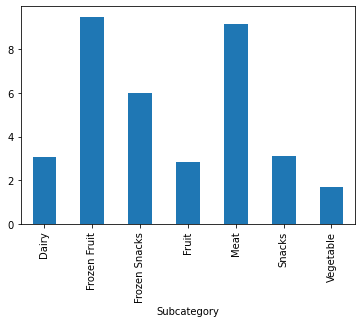

In [22]:
# create a bar chart
groceries.groupby('Subcategory')['Price_Dollars'].mean().plot.bar();

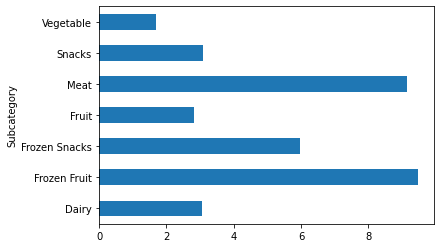

In [23]:
# create a horizontal bar chart
groceries.groupby('Subcategory')['Price_Dollars'].mean().plot.barh();

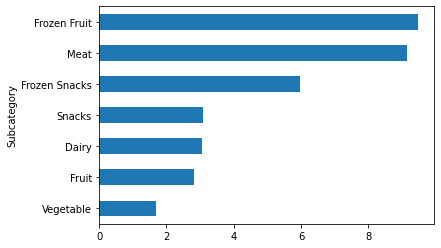

In [24]:
# create a horizontal bar chart with sorted values
groceries.groupby('Subcategory')['Price_Dollars'].mean().sort_values().plot.barh();

In [25]:
import pandas as pd

happiness = pd.read_csv('../Data/happiness_survey_data.csv')
happiness.head()

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Afghanistan,2008,3.723590,0.450662,0.718114,50.500000
1,Afghanistan,2009,4.401778,0.552308,0.678896,50.799999
2,Afghanistan,2010,4.758381,0.539075,0.600127,51.099998
3,Afghanistan,2011,3.831719,0.521104,0.495901,51.400002
4,Afghanistan,2012,3.782938,0.520637,0.530935,51.700001


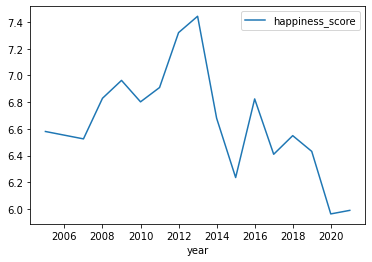

In [26]:
# create a line chart for Mexico's happiness scores
happiness[happiness.country_name == 'Mexico'].iloc[:, 1:3].plot.line(x='year', y='happiness_score');

In [27]:
# subset and pivot data to create multiple plots
(happiness[happiness.country_name.isin(['Canada', 'Mexico','United States'])]
                                 .iloc[:, :3]
                                 .pivot(index='year', columns='country_name', values='happiness_score'))

country_name,Canada,Mexico,United States
year,,,
2005,7.418048,6.580658,NaN
2006,NaN,NaN,7.181794
2007,7.481753,6.525378,7.512688
2008,7.485604,6.829036,7.280386
2009,7.487824,6.962819,7.158032
2010,7.650346,6.802389,7.163616
2011,7.426054,6.909515,7.115139
2012,7.415144,7.320185,7.026227
2013,7.593794,7.442546,7.249285


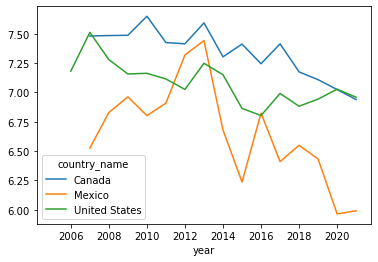

In [28]:
# create a line chart with multiple lines
(happiness[happiness.country_name.isin(['Canada', 'Mexico','United States'])]
                                 .iloc[:, :3]
                                 .pivot(index='year', columns='country_name', values='happiness_score')
                                 .plot());

## 5. Pair Plot

In [29]:
import seaborn as sns

student_data = pd.read_csv('../Data/student_data.csv')
student_data.head()

,Hours of Sleep,Hours Studied,Grade on Test,Grade in Class,Cups of Coffee
0,10.602667,4.586892,99,99.187294,5
1,8.172997,4.405120,72,67.070903,3
2,6.430132,0.519630,52,39.644696,4
3,7.963793,5.004348,80,61.843705,1
4,8.279421,2.984489,87,103.495002,0


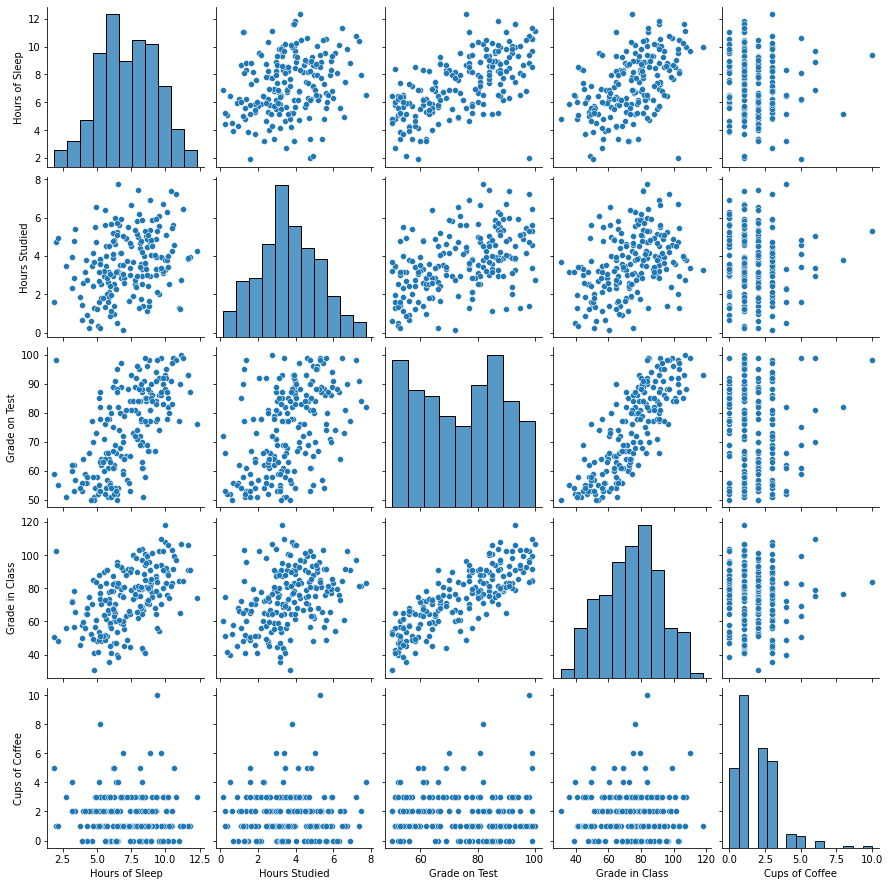

In [30]:
sns.pairplot(student_data);

## 6. More Plots

In [31]:
student_data['Cups of Coffee']

0       5
1       3
2       4
3       1
4       0
       ..
195     2
196     1
197     1
198    10
199     2
Name: Cups of Coffee, Length: 200, dtype: int64

In [32]:
# frequency table of discrete data
(student_data['Cups of Coffee'].value_counts()
                               .sort_index())

0     35
1     67
2     44
3     38
4      6
5      5
6      3
8      1
10     1
Name: Cups of Coffee, dtype: int64

<AxesSubplot:xlabel='Cups of Coffee', ylabel='Count'>

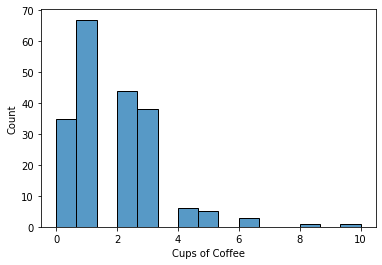

In [33]:
# histogram
sns.histplot(student_data['Cups of Coffee'])

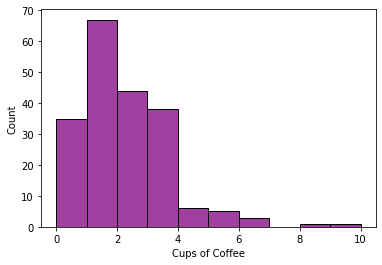

In [34]:
# another histogram
sns.histplot(student_data['Cups of Coffee'],
             bins=10, color='purple');

In [35]:
# frequency table of continuous data
student_data['Hours Studied'].round().value_counts().sort_index()

0.0     4
1.0    18
2.0    23
3.0    53
4.0    38
5.0    37
6.0    19
7.0     7
8.0     1
Name: Hours Studied, dtype: int64

<AxesSubplot:xlabel='Hours Studied', ylabel='Count'>

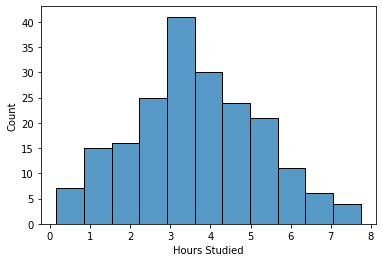

In [36]:
# histogram of continuous data
sns.histplot(student_data['Hours Studied'])

<AxesSubplot:xlabel='Hours of Sleep', ylabel='Grade on Test'>

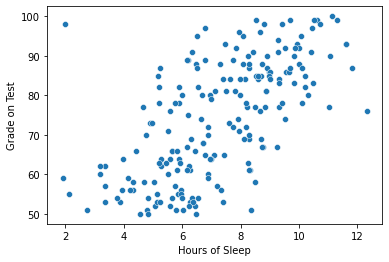

In [37]:
# scatter plot of data
sns.scatterplot(data=student_data, x='Hours of Sleep', y='Grade on Test')

In [38]:
# digging into an outlier
student_data[student_data['Hours of Sleep'] < 3]

,Hours of Sleep,Hours Studied,Grade on Test,Grade in Class,Cups of Coffee
12,2.000000,4.743829,98,102.670751,1
67,2.741172,3.498785,51,56.135378,3
97,2.130628,4.951326,55,48.417485,1
148,1.899843,1.584035,59,50.616890,5


In [39]:
# correlation table
student_data.corr()

,Hours of Sleep,Hours Studied,Grade on Test,Grade in Class,Cups of Coffee
Hours of Sleep,1.000000,0.265404,0.637864,0.502397,-0.079643
Hours Studied,0.265404,1.000000,0.479153,0.374456,-0.020209
Grade on Test,0.637864,0.479153,1.000000,0.815721,-0.038804
Grade in Class,0.502397,0.374456,0.815721,1.000000,-0.035288
Cups of Coffee,-0.079643,-0.020209,-0.038804,-0.035288,1.000000
